In [1]:
import matplotlib as mplt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy.signal import find_peaks

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# scaler = StandardScaler()
scaler = MinMaxScaler()


data = pd.read_csv(f'data/ash-circle/1.csv')
data.columns = ['time', 'x', 'y', 'z', 'abs']

lower_percentile = data['time'].quantile(0.1)
upper_percentile = data['time'].quantile(0.9)

data = data[(data['time'] >= lower_percentile) & (data['time'] <= upper_percentile)] ## trim the edges of the data

scaled_features = scaler.fit_transform(data)
df = pd.DataFrame(scaled_features, columns=data.columns)

In [7]:
def preprocess_signal(s):
    mean_filter_window_size = 5
    processed_signal = np.convolve(s, 
                                   np.ones((mean_filter_window_size,))/mean_filter_window_size, 
                                   mode='valid')
    return processed_signal

In [8]:
df_cleaned = df.apply(preprocess_signal)


<Axes: xlabel='time'>

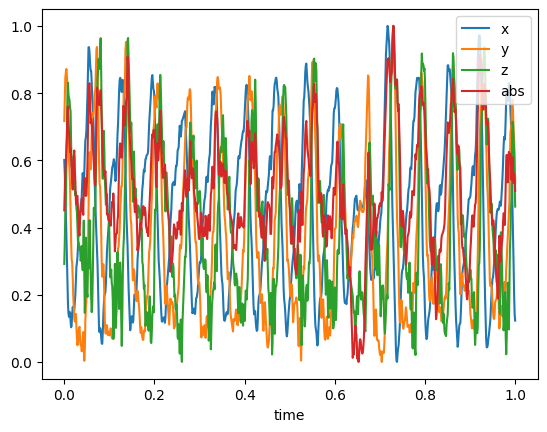

In [10]:
df.plot(x='time', y=['x', 'y', 'z', 'abs'])


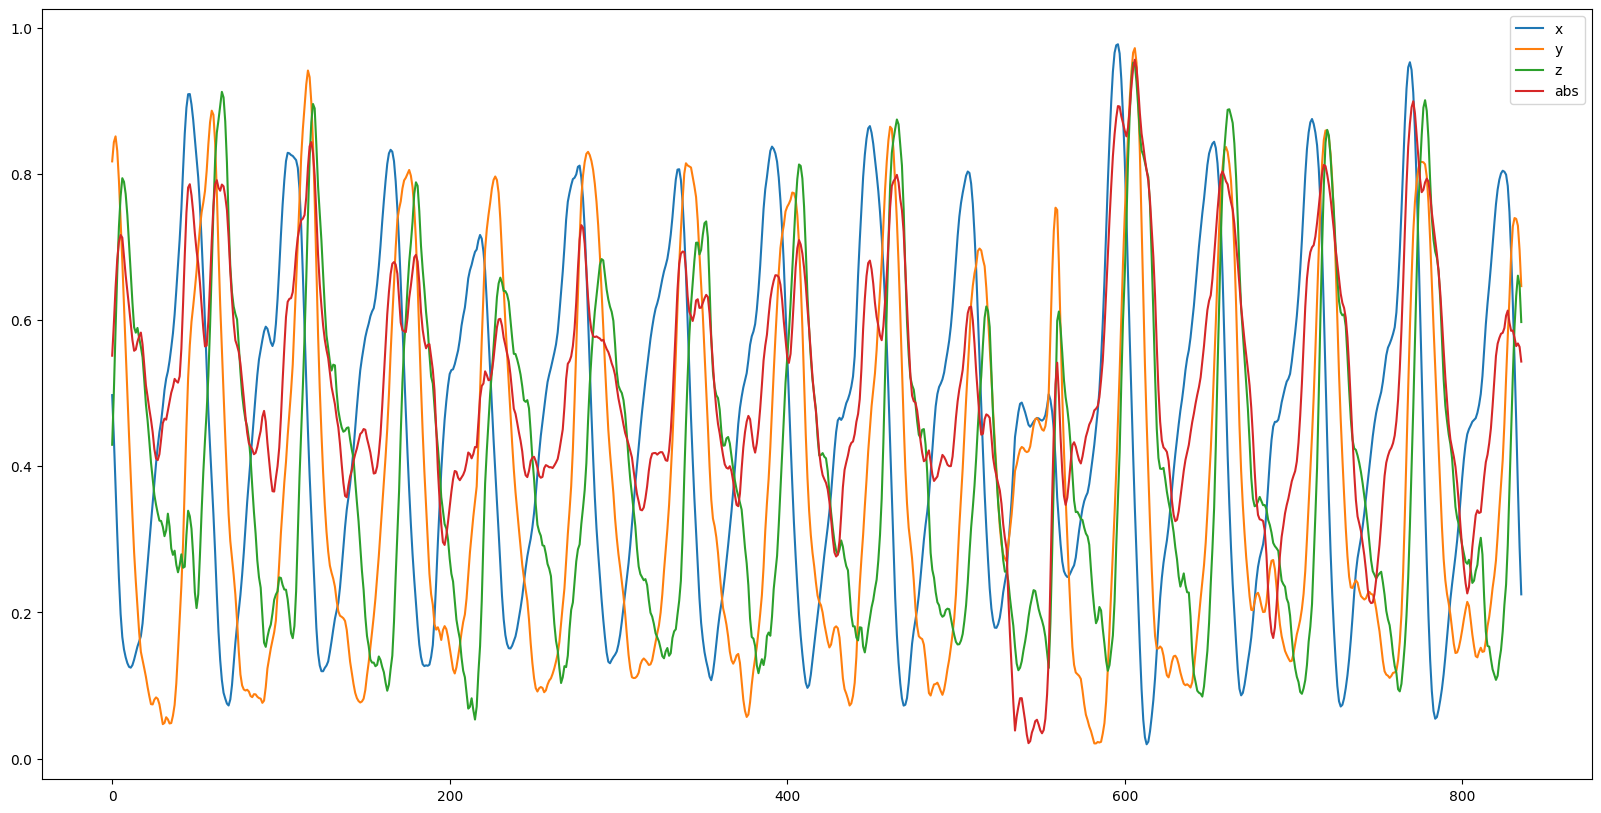

In [13]:
plt.figure(figsize=(20, 10))

for col in df_cleaned.columns[1:]:
      plt.plot(df_cleaned.index,df_cleaned[col], label=col)
      plt.legend()